## Objective:

- To explore and visualize the dataset
- Build a linear regression model to predict the prices of used cars
- generate a set of insights and recommendations that will help the business.

## Data:

<b>used_cars_data.csv</b> - Contains information about used cars and prices
- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs
- Price: The price of the used car in INR Lakhs

### Importing the necessary package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Reading the Dataset

In [2]:
data = pd.read_csv("used_cars_data.csv")

In [3]:
#Copying data to a new variable as to not mess up original
df = data.copy()

### Viewing first and last 5 rows

In [4]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


- S.No. and index are the same
- Mileage has 2 different units kmpl and km/kg
- Engine and Power uses constant units
- lots of missing values in New_Price and Price

### Understanding the shape of the dataset

In [6]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string


There are 7253 rows and 14 columns.


### Checking the data types and values

In [7]:
#checking for duplicate rows
df.duplicated().sum()

0

In [8]:
#We don't need S.No. as it is useless to us
df.drop(['S.No.'],axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


- Fuel_Type, Transmission and Owner_Type should be categories
- Mileage, Engine, New_Price and Power should be float
- Seats could be int or categories
- Missing values in Mileage, Engine, Power, Seats, New_Price and Price
- New_Price missing majority of values

## Fixing the data types

In [10]:
# list of columns to change to categories 
categorical_var = ['Fuel_Type', 'Transmission', 'Owner_Type']
#changing types
for colname in categorical_var:
    df[colname] = df[colname].astype('category')
#checking if properly changed
df.dtypes   

Name                   object
Location               object
Year                    int64
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage                object
Engine                 object
Power                  object
Seats                 float64
New_Price              object
Price                 float64
dtype: object

In [11]:
#functions to change mileage, power and engine to float
def mileage_to_num(mileage):
    if isinstance(mileage,str):
        return float(mileage.replace('km/kg','').replace('kmpl',''))
    elif isinstance(mileage,float):
        return mileage
    elif isinstance(mileage,int):
        return float(mileage)
    else:
        return np.nan
#explaining this one as the rest follow a similar model    
def CC_to_num(engine): #defining function
    if isinstance(engine,str): # if input is a string
        return float(engine.replace('CC','')) #delete the word CC and return as float
    elif isinstance(engine,float): #if it is already a float return it as float
        return engine
    elif isinstance(engine,int): #if it is an int turn it into a float
        return float(engine)
    else:                       #otherwise it is nan and return nan
        return np.nan
def power_to_num(power):
    if isinstance(power,str):
        return float(power.replace('bhp',''))
    elif isinstance(power,float):
        return power
    elif isinstance(power,int):
        return float(power)
    else:
        return np.nan
df['Mileage'] = df['Mileage'].apply(mileage_to_num)
df['Engine'] = df['Engine'].apply(CC_to_num)
df['Power'] = df['Power'].apply(power_to_num)

In [12]:
#checking if correct changes occured
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   object  
 1   Location           7253 non-null   object  
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7200 non-null   float64 
 11  New_Price          1006 non-null   object  
 12  Price              6019 non-null   float64 
dtypes: category(3), float64(5), int64(2), object(3)
memory usage: 588.5+ KB


In [13]:
#fixing New_Price, works similar to previous functions except using a multiplier to change to correct currency
def curr_conv(currency) :
    if isinstance(currency,str):
        multiplier = 1
        if currency.endswith('Lakh'):
            multiplier = 1
        if currency.endswith('Cr'):
            multuplier = 100
        return float(currency.replace('Cr','').replace('Lakh','')) * multiplier
    elif isinstance(currency,int):
        return currency
    elif isinstance(currency,float):
        return currency
    else:
        return np.nan
df['New_Price'] = df['New_Price'].apply(curr_conv)

In [14]:
#checking if correct changes occured
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   object  
 1   Location           7253 non-null   object  
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7200 non-null   float64 
 11  New_Price          1006 non-null   float64 
 12  Price              6019 non-null   float64 
dtypes: category(3), float64(6), int64(2), object(2)
memory usage: 588.5+ KB


- Fuel_Type, Transmission and Owner_Type hae become categories
- Mileage, Engine, Power and New_Price have become floats 
- we can see memory usage has decreased from 793.4+ KB to 645.2+ KB

## Checking null and inferenced pre-processing

In [15]:
# checking for missing values in the data.
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [16]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.0,NaN,NaN,NaN,18.14158,4.562197,0.0,15.17,18.16,21.1,33.54
Engine,7207.0,NaN,NaN,NaN,1616.57347,595.285137,72.0,1198.0,1493.0,1968.0,5998.0
Power,7078.0,NaN,NaN,NaN,112.765214,53.493553,34.2,75.0,94.0,138.1,616.0


- All Quartiles of seats is 5 suggesting that 5 is the most dominant number of seats
- Diesel is the most occuring fuel type
- The most occuring Transmission is manual
- The most frequent type of owner is First time owner
- Kilometers_Driven on the cars has a wide range starting from 171km going to 650,000km  

## Data Preprocessing - Missing Value Treatment

### Dropping missing values from the <i>Price</i> column as it is the independent variable

In [17]:
df.dropna(subset=["Price"], inplace=True)

In [18]:
# checking missing values in rest of the data
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
dtype: int64

### Look at entries with no New Price

In [19]:
df[df.New_Price.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,NaN,2.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6013,Honda Amaze VX i-DTEC,Coimbatore,2015,70602,Diesel,Manual,First,25.80,1498.0,98.60,5.0,NaN,4.83
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,NaN,2.65


- Since it is difficult to impute the new price for various car models we will drop the entries.

In [20]:
df.dropna(subset=["New_Price"], inplace=True)

In [21]:
# checking missing values in rest of the data
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              1
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [22]:
### Looking at entries with no Mileage

In [23]:
df[df.Mileage.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.0


- While mileage is difficult to impute, because it is only a singular car we can check for skew and then use either the mean or median mileage

In [24]:
mileage = df.dropna(subset=["Mileage"], inplace=False)

In [25]:
mileage.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,2015.869988,40498.402187,19.575589,1615.489672,120.227995,5.304982,20.328906,13.647606
std,2.378709,28791.171759,4.614245,562.811691,55.623259,0.795707,20.209032,14.860539
min,2001.000000,600.000000,0.000000,799.000000,53.000000,2.000000,1.000000,0.700000
25%,2015.000000,20487.500000,16.770000,1197.000000,81.860000,5.000000,7.840000,5.000000
50%,2016.000000,34895.000000,19.160000,1497.000000,99.000000,5.000000,11.390000,8.200000
75%,2017.000000,53829.000000,22.690000,1995.000000,166.850000,5.000000,24.010000,17.500000
max,2019.000000,215000.000000,33.540000,4951.000000,444.000000,8.000000,99.920000,160.000000


In [26]:
mileage.Mileage.median()

19.16

- The Mean and Median of the mileage as slightly different, with the mean being larger indicating a slight right skew, we will use median to replace the value

In [27]:
df['Mileage'].fillna(df['Mileage'].median(), inplace=True)

In [28]:
# checking missing values in rest of the data
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

## Data Preprocessing - Outlier Treatment

### Testing for the effect of outliers on data

- For the purposes of this study significant theshold of outlier pull will be 5%+
- Outliers calculated here are the extremes in the data set and are different from outliers references when looking at boxplot graphs later

#### Kilometers_Driven

In [29]:
# checking via IQR, printing a list of outliers beyong 4*IQR
quartiles = np.quantile(df['Kilometers_Driven'],[.25, .75])
km_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {km_4iqr}')
outlier_km = df.loc[np.abs(df['Kilometers_Driven'] - df['Kilometers_Driven'].median()) > km_4iqr, 'Kilometers_Driven']
outlier_km

Q1 = 20487.75, Q3 = 53823.0, 4*IQR = 133341.0


838     215000
1717    169000
3640    169006
5254    170000
Name: Kilometers_Driven, dtype: int64

In [30]:
# Creating a set without outliers
Km = df['Kilometers_Driven']
Km.drop(outlier_km.index, axis=0, inplace=True)

In [31]:
#Checking differences in data
print(f'Original mean: {df.Kilometers_Driven.mean()}')
print(f'Original median: {df.Kilometers_Driven.median()}')
print(f'Dropped outliers mean: {Km.mean()}')
print(f'Dropped outliers median: {Km.median()}')

Original mean: 40509.93325242718
Original median: 34897.5
Dropped outliers mean: 39825.82804878049
Dropped outliers median: 34687.0


- only 0.5 value change in median and 1.7% change in mean, seem to be robust against outliers, no need to change them

#### Seats

- Seats can be treated as a category or float, Outliers matter within the context of price and so will not be changed

#### Engine

In [32]:
quartiles = np.quantile(df['Engine'],[.25, .75])
engine_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {engine_4iqr}')
outlier_engine = df.loc[np.abs(df['Engine'] - df['Engine'].median()) > engine_4iqr, 'Engine']
outlier_engine

Q1 = 1197.0, Q3 = 1995.0, 4*IQR = 3192.0


4451    4951.0
Name: Engine, dtype: float64

In [33]:
# Creating a set without outliers
engine = df['Engine']
engine.drop(outlier_engine.index, axis=0, inplace=True)

In [34]:
#Checking differences in data
print(f'Original mean: {df.Engine.mean()}')
print(f'Original median: {df.Engine.median()}')
print(f'Dropped outliers mean: {engine.mean()}')
print(f'Dropped outliers median: {engine.median()}')

Original mean: 1613.616504854369
Original median: 1497.0
Dropped outliers mean: 1609.561360874848
Dropped outliers median: 1497.0


- Engine has only one outlier, median completely unaffected and mean is relatively robust to the data with only a change of 0.26%

#### Power

In [35]:
quartiles = np.quantile(df['Power'][df['Power'].notnull()], [.25, .75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}')
outlier_powers = df.loc[np.abs(df['Power'] - df['Power'].median()) > power_4iqr, 'Power']
outlier_powers

Q1 = 81.86, Q3 = 165.27499999999998, 4*IQR = 333.6599999999999


148     444.0
4061    444.0
Name: Power, dtype: float64

In [36]:
# Creating a set without outliers
power = df['Power']
power.drop(outlier_powers.index, axis=0, inplace=True)

In [37]:
#Checking differences in data
print(f'Original mean: {df.Power.mean()}')
print(f'Original median: {df.Power.median()}')
print(f'Dropped outliers mean: {power.mean()}')
print(f'Dropped outliers median: {power.median()}')

Original mean: 120.13184466019439
Original median: 99.0
Dropped outliers mean: 119.34384428223863
Dropped outliers median: 99.0


- Power has only two outliers, median completely unaffected and mean is relatively robust to the data with only a change of 0.66%

#### Mileage

In [38]:
quartiles = np.quantile(df['Mileage'][df['Mileage'].notnull()], [.25, .75])
mileage_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {mileage_4iqr}')
outlier_mileage = df.loc[np.abs(df['Mileage'] - df['Mileage'].median()) > mileage_4iqr, 'Mileage']
outlier_mileage

Q1 = 16.77, Q3 = 22.69, 4*IQR = 23.680000000000007


Series([], Name: Mileage, dtype: float64)

No outliers in Mileage to deal with

#### Price

In [39]:
# checking via IQR, printing a list of outliers beyong 4*IQR
quartiles = np.quantile(df['Price'],[.25, .75])
price_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {price_4iqr}')
outlier_price = df.loc[np.abs(df['Price'] - df['Price'].median()) > price_4iqr, 'Price']
outlier_price

Q1 = 5.0, Q3 = 17.5, 4*IQR = 50.0


264      61.29
327      62.67
418      70.99
941      59.72
1336     67.00
1505     97.07
1583     72.94
1690     70.80
1830     64.87
1885     79.00
2095     83.96
2319     78.80
2767     59.29
2808     64.95
3268     59.65
3752     70.66
4079    160.00
4527     65.00
5009     68.00
5118     60.75
5516     61.25
5545     64.75
Name: Price, dtype: float64

In [40]:
# Creating a set without outliers
price = df['Price']
price.drop(outlier_price.index, axis=0, inplace=True)

In [41]:
#Checking differences in data
print(f'Original mean: {df.Price.mean()}')
print(f'Original median: {df.Price.median()}')
print(f'Dropped outliers mean: {price.mean()}')
print(f'Dropped outliers median: {price.median()}')

Original mean: 13.646820388349505
Original median: 8.2
Dropped outliers mean: 12.021907730673309
Dropped outliers median: 8.0


In [42]:
price.mean()/df.Price.mean() * 100

88.09310439035741

- Price has alot of outliers that are pulling down the mean by a 12%, this is significant and so to treat these outliers they will be dropped as our independent variable is price

In [43]:
df.drop(outlier_price.index, axis=0, inplace=True)

#### New Price

In [44]:
# checking via IQR, printing a list of outliers beyong 4*IQR
quartiles = np.quantile(df['New_Price'],[.25, .75])
newp_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {newp_4iqr}')
outlier_newp = df.loc[np.abs(df['New_Price'] - df['New_Price'].median()) > newp_4iqr, 'New_Price']
outlier_newp

Q1 = 7.87, Q3 = 23.235, 4*IQR = 61.459999999999994


134     95.04
310     79.43
473     86.97
802     78.76
1113    86.97
2111    78.76
3266    87.57
4451    83.92
4755    74.49
4988    78.31
5107    79.43
5175    79.78
Name: New_Price, dtype: float64

In [45]:
# Creating a set without outliers
newp = df['New_Price']
newp.drop(outlier_newp.index, axis=0, inplace=True)

In [46]:
#Checking differences in data
print(f'Original mean: {df.New_Price.mean()}')
print(f'Original median: {df.New_Price.median()}')
print(f'Dropped outliers mean: {newp.mean()}')
print(f'Dropped outliers median: {newp.median()}')

Original mean: 19.269052369077315
Original median: 11.315000000000001
Dropped outliers mean: 18.309303797468356
Dropped outliers median: 11.27


In [47]:
newp.mean()/df.New_Price.mean() * 100

95.01922277636679

- New price has 12 outliers, very small effect pulling the median, 4.9% pull on the mean which may be significant

## Data preprocessing - Feature Engineering

In [48]:
# looking at value counts for non-numeric features

num_to_display = 10  # defining this up here so it's easy to change later if I want
for colname in df.dtypes[df.dtypes == 'object'].index:
    val_counts = df[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n\n') # just for more space between 

Maruti Alto K10 VXI                        16
Toyota Innova Crysta 2.8 ZX AT             14
BMW 3 Series 320d                          13
BMW 5 Series 520d Luxury Line              12
Maruti Vitara Brezza ZDi Plus Dual Tone    12
Hyundai Grand i10 1.2 Kappa Sportz         11
Maruti Wagon R VXI                         11
BMW 3 Series Luxury Line                   10
Maruti Eeco 7 Seater Standard              10
Hyundai Grand i10 1.2 Kappa Asta            9
Name: Name, dtype: int64
Only displaying first 10 of 313 values.



Kochi         138
Mumbai        135
Coimbatore    126
Hyderabad      79
Pune           61
Kolkata        55
Delhi          52
Chennai        48
Jaipur         41
Ahmedabad      36
Name: Location, dtype: int64
Only displaying first 10 of 11 values.





- Name has way too many values, can simplify and get more generalized information by turning names into brands
- Names seems to be structured as:  Brand, seriesline, extra info

In [49]:
def name_to_brand(string):
    brand =string.split()
    return brand[0]

In [50]:
df['Name'] = df['Name'].apply(name_to_brand)
df.rename(columns={"Name":"Brand"},inplace = True)

In [89]:
# looking at value counts for non-numeric features

num_to_display = 10  # defining this up here so it's easy to change later if I want
for colname in df.dtypes[df.dtypes == 'object'].index:
    val_counts = df[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n\n') # just for more space between 

Maruti           194
Hyundai           96
Toyota            82
Honda             68
BMW               56
Tata              43
Volkswagen        42
Mercedes-Benz     30
Renault           27
Mahindra          26
Name: Brand, dtype: int64
Only displaying first 10 of 24 values.



Kochi         138
Mumbai        135
Coimbatore    126
Hyderabad      79
Pune           61
Kolkata        55
Delhi          52
Chennai        48
Jaipur         41
Ahmedabad      36
Name: Location, dtype: int64
Only displaying first 10 of 11 values.





### Treatment for null values is complete, we now have clean data we can use for EDA

### Univariate Analysis

#### Numerical Variables

In [51]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

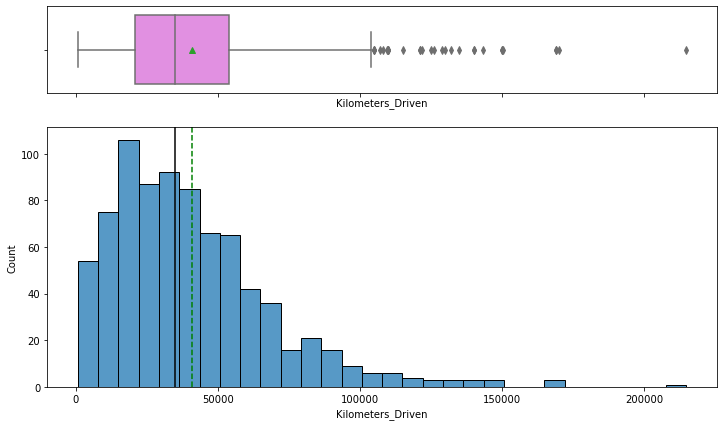

In [52]:
histogram_boxplot(df, 'Kilometers_Driven')

- Distribution of Kilomerers driven is right skewed with many outliers

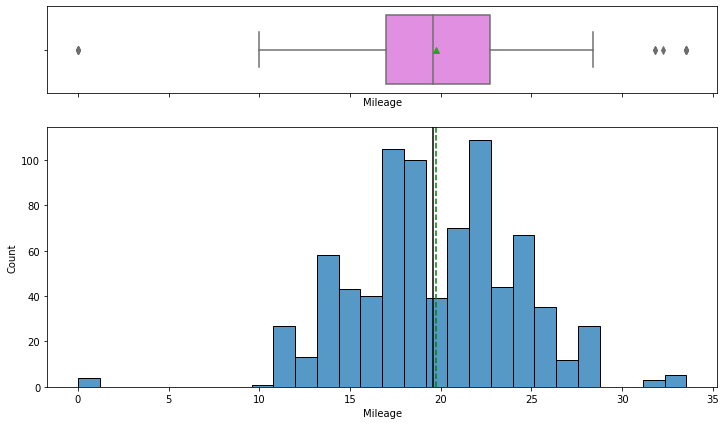

In [53]:
histogram_boxplot(df, 'Mileage')

- Distribution of Mileage is slightly left skewed with few outliers

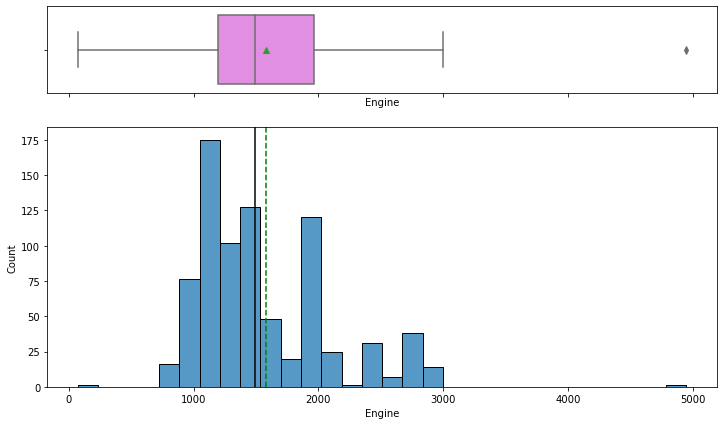

In [54]:
histogram_boxplot(df, 'Engine')

- Distribution of Engine driven is right skewed with few outliers

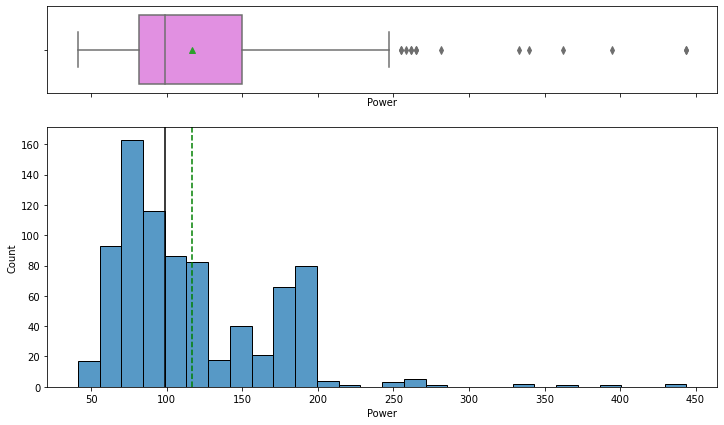

In [55]:
histogram_boxplot(df, 'Power')

- Distribution of engine power is right skewed with few outliers

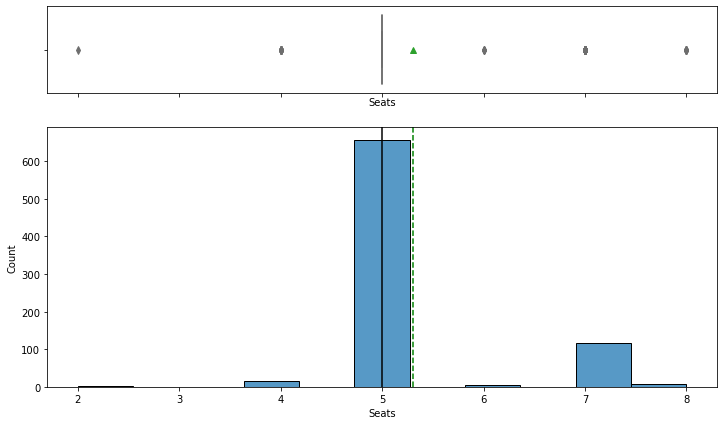

In [56]:
histogram_boxplot(df, 'Seats')

- shows a right skew, because most values are 5, boxplot distribution looks extremely condensed

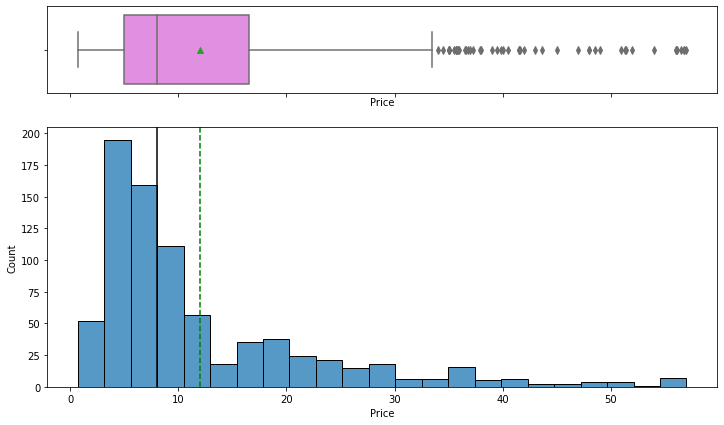

In [57]:
histogram_boxplot(df, 'Price')

- Price distribution is highly right skewed with many outliers

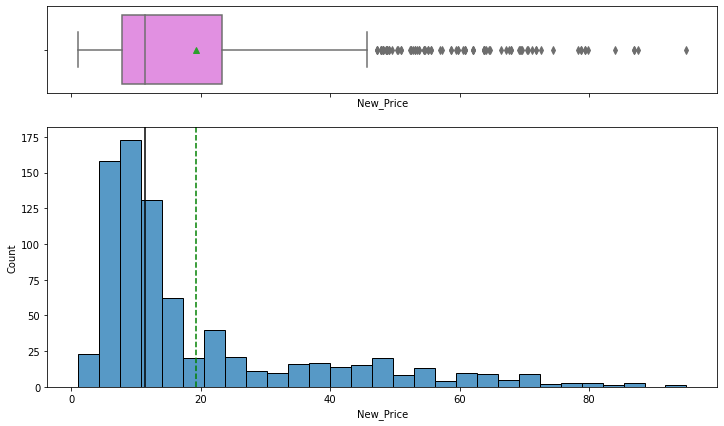

In [58]:
histogram_boxplot(df, 'New_Price')

- New Price distribution is highly right skewed with many outliers, shows similar distribution to Price

#### Categorical Variables

In [59]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

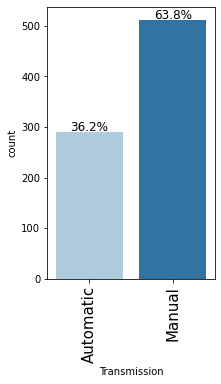

In [60]:
labeled_barplot(df,'Transmission', perc=True) 

- Most used cars are manual transmission however almost 38% run automatic so the difference is not too extreme

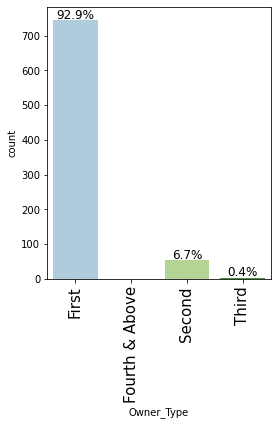

In [61]:
labeled_barplot(df,'Owner_Type', perc=True) 

- Most owners are first time owners the little that remain are second time owners with few to no people being third or fourth and above

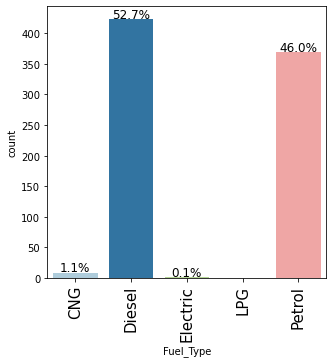

In [62]:
labeled_barplot(df,'Fuel_Type', perc=True) 

- Most used cars use Diesel or petrol, little to non to CNG, LGP or run on electric

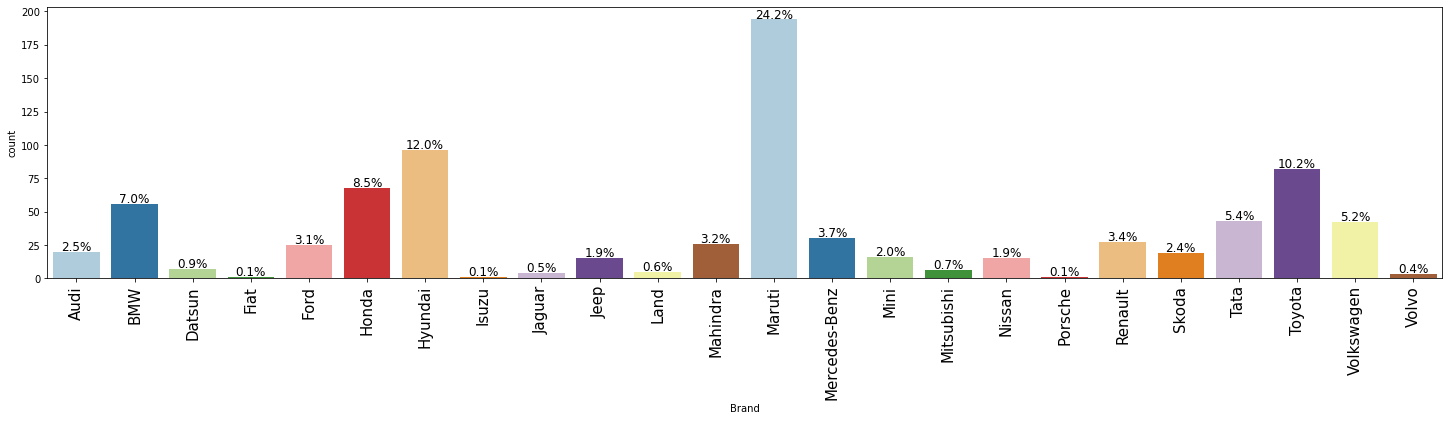

In [63]:
labeled_barplot(df,'Brand', perc=True) 

- Out of all the car brands the most sold used cars are Maruti Suzuki brand

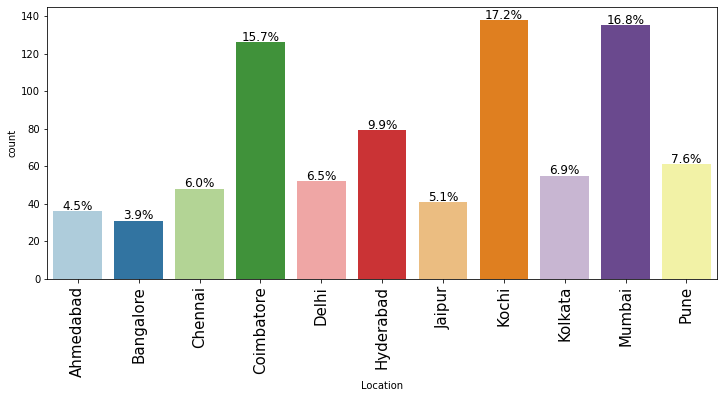

In [64]:
labeled_barplot(df,'Location', perc=True) 

- The 3 locations with the highest sales are Coimbatore, Kochi and Mumbai

### Bivariate analysis

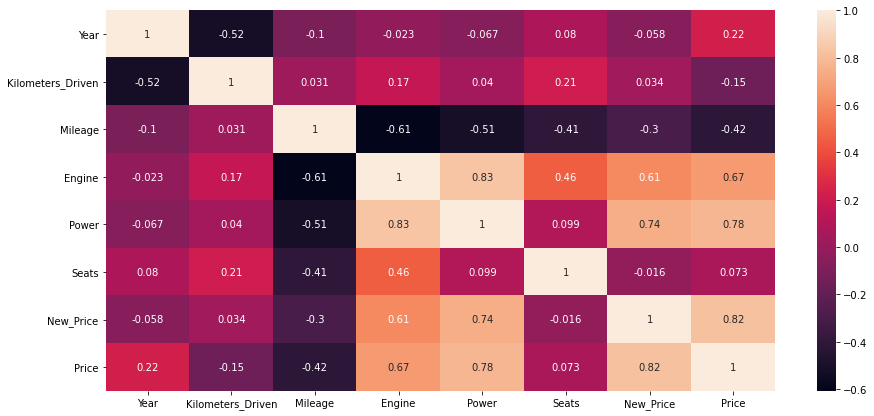

In [65]:
plt.figure(figsize=(15, 7)) #change figure size
sns.heatmap(df.corr(), annot=True) # visual colored map of correlation table.
plt.show() #shows graph

- power and engine highly correlated
- power and price highly correlated
- Engine and New price as well as Engine and Price moderately positively correlated
- New price and power moderately positively correlated
- New price and price moderately positively correlated
- engine and mileage moderately negatively correlated
- Year and kilometers driven moderately negatevely correlated

### Variation in price vs categorical columns

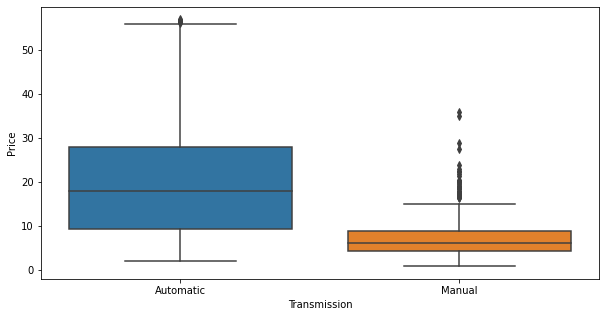

In [66]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Transmission", y="Price", data=df)
plt.show()

- Automatic cars fetch a higher price range, the upper price range of manual cars is about the equivalent of the mean price range of automatic cars, there is a range of outliers in both transmission types however the range of outliers of the manual cars price do not exceed the upper whisker limit of automatic car prices

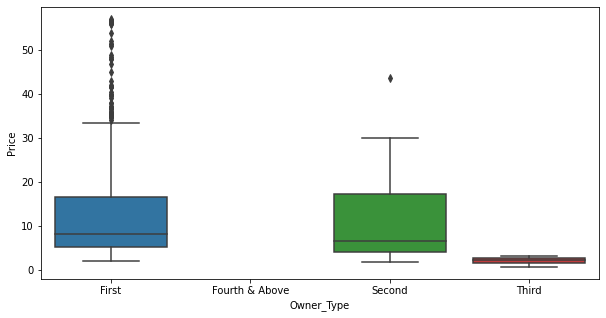

In [67]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Owner_Type", y="Price", data=df)
plt.show()

- First type ownership has the widest price range as well as the widest range outliers among the 4 types
- Second type owners have the biggest interquartile range
- Third type owners has the lowest range, IQR and mean

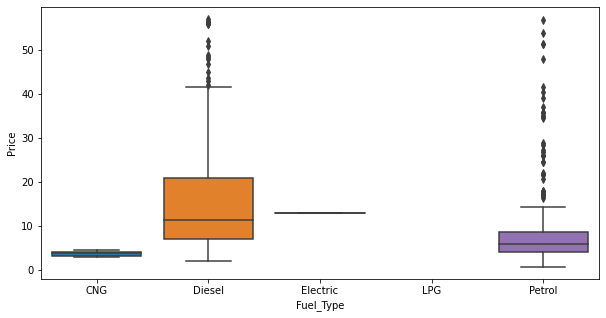

In [68]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Fuel_Type", y="Price", data=df)
plt.show()

- Diesel has the highest price range and the widest outlier range as well as biggest IQR
- electric has the highest mean but very little distrubition
- petrol has the next highest range and the second biggest outlier distribution
- no cars in the LPG group
- CNG has a very small IQR and the lowest price mean for used cars

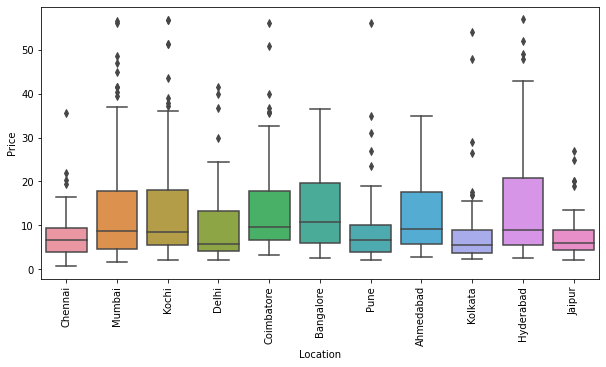

In [69]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
sns.boxplot(x="Location", y="Price", data=df)
plt.show()

- Cars sold for higher prices at Hyderabad, followed by Mumbai, Bangalor, Koichi and Ahmedabad

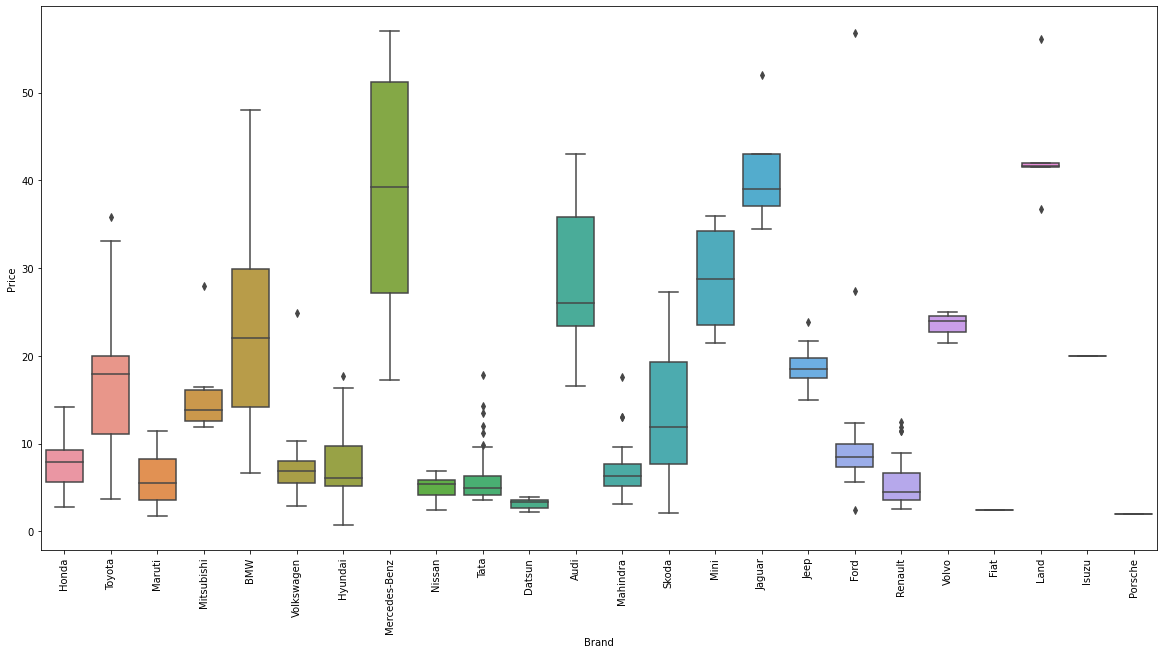

In [70]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
sns.boxplot(x="Brand", y="Price", data=df)
plt.show()

- Used car brands sold at the highest price is Mercedes-Benz, Jaguar and Land Rover
- the ones sold at the lowest are Fiat, Porsche and Datsun

## Variable Transformation

### Double checking skewness

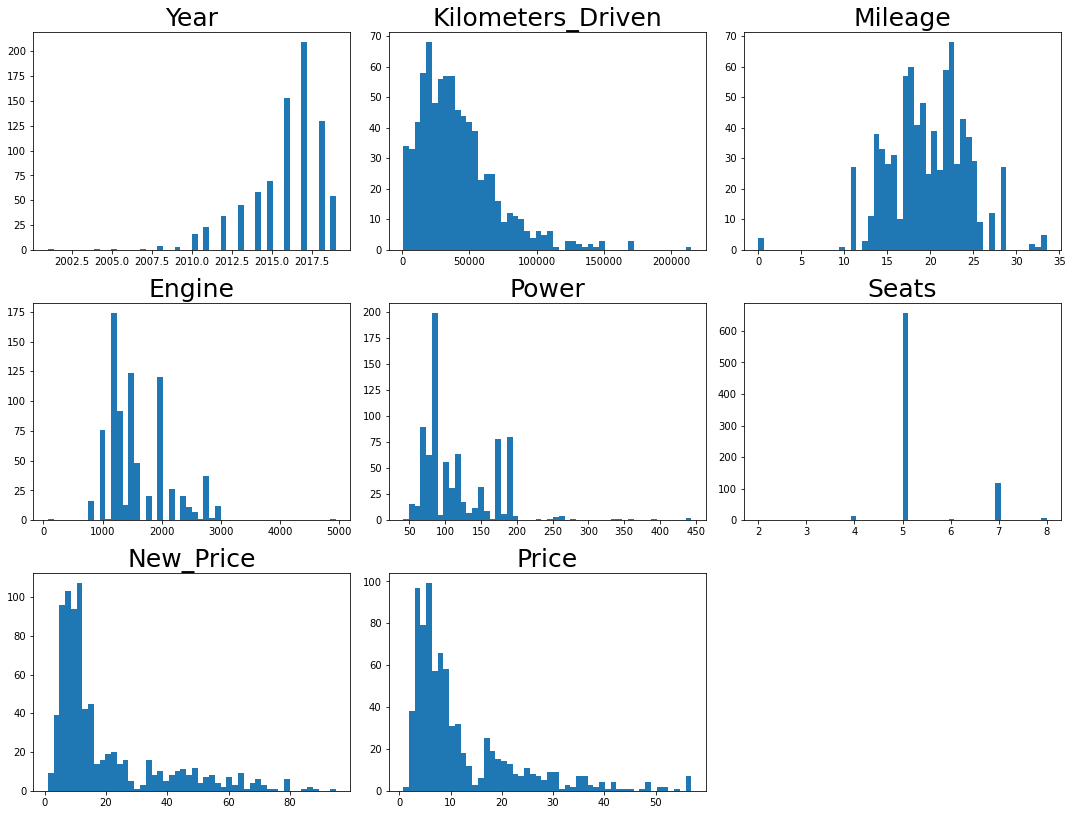

In [71]:
dist_cols = [
    item for item in df.select_dtypes(include=np.number).columns
]

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df[dist_cols[i]], bins=50)
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

- All columns have a skweed distribution, we will apply a log transformation to deal with skewness

In [72]:
df2 = df.copy()
for col in dist_cols:
    df2[col + "_log"] = np.log(df2[col] + 1)
df2.drop(dist_cols, axis=1, inplace=True)
df2.head()

,Brand,Location,Fuel_Type,Transmission,Owner_Type,Year_log,Kilometers_Driven_log,Mileage_log,Engine_log,Power_log,Seats_log,New_Price_log,Price_log
2,Honda,Chennai,Petrol,Manual,First,7.606885,10.736418,2.954910,7.090077,4.496471,1.791759,2.262804,1.704748
7,Toyota,Mumbai,Diesel,Automatic,First,7.609367,10.491302,2.514465,7.921536,5.150397,2.197225,3.091042,2.917771
10,Maruti,Kochi,Petrol,Manual,First,7.610358,10.153974,3.116178,7.288244,4.646792,1.791759,2.455306,2.393339
15,Mitsubishi,Delhi,Diesel,Manual,First,7.608374,11.608245,2.674149,7.815207,5.173661,2.079442,3.496811,2.772589
20,BMW,Kochi,Diesel,Automatic,First,7.608374,10.403748,3.165053,7.598900,5.252273,1.791759,3.889164,2.972975


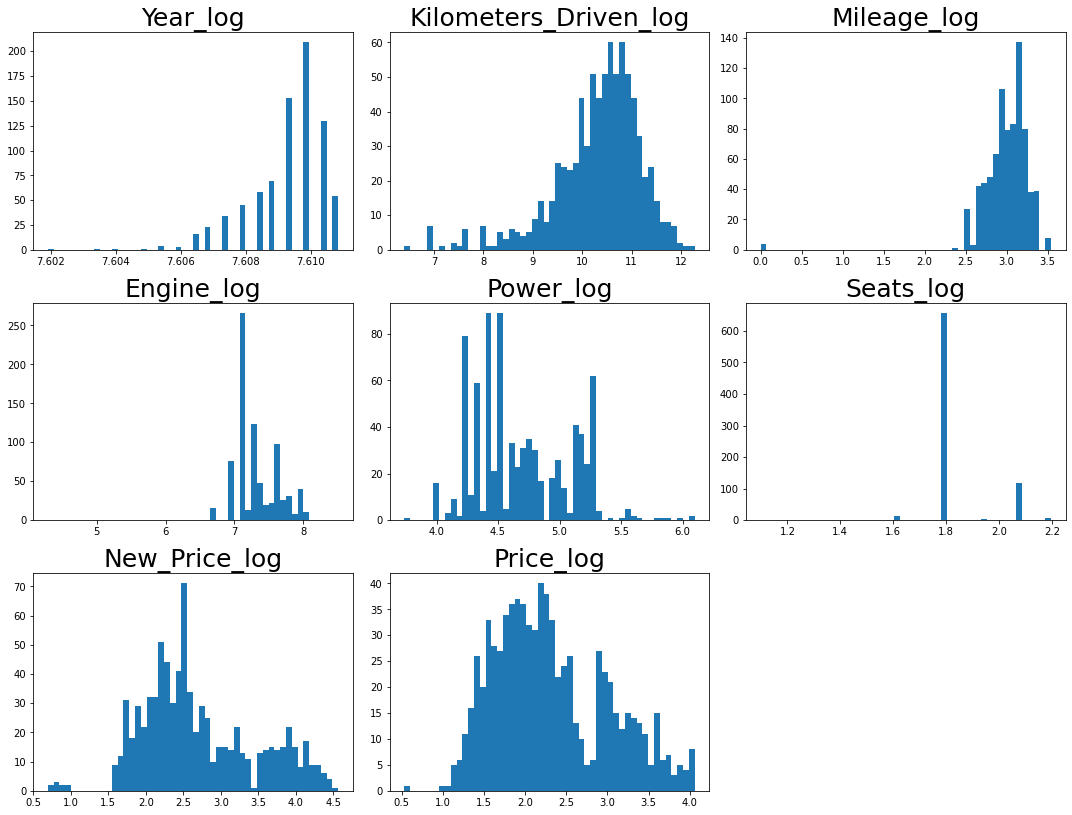

In [73]:
dist_cols = [
    item for item in df2.select_dtypes(include=np.number).columns
]

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df2[dist_cols[i]], bins=50)
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

- Some columns more normally distributed, but all still skewed

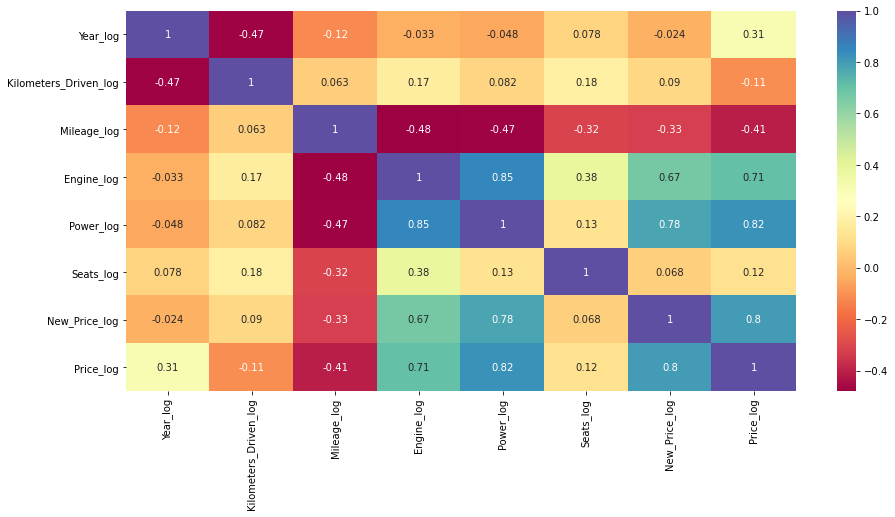

In [74]:
plt.figure(figsize=(15, 7)) #change figure size
sns.heatmap(df2[dist_cols].corr(), annot=True, cmap="Spectral") # visual colored map of correlation table.
plt.show() #shows graph

- In general slightly more correlated amongst all variables, doesnt not visually seem too significant.

## Model Building

### Defining dependent variable

In [75]:
X = df2.drop(['Price_log'],axis =1)
y = df2['Price_log']
X.head()

,Brand,Location,Fuel_Type,Transmission,Owner_Type,Year_log,Kilometers_Driven_log,Mileage_log,Engine_log,Power_log,Seats_log,New_Price_log
2,Honda,Chennai,Petrol,Manual,First,7.606885,10.736418,2.954910,7.090077,4.496471,1.791759,2.262804
7,Toyota,Mumbai,Diesel,Automatic,First,7.609367,10.491302,2.514465,7.921536,5.150397,2.197225,3.091042
10,Maruti,Kochi,Petrol,Manual,First,7.610358,10.153974,3.116178,7.288244,4.646792,1.791759,2.455306
15,Mitsubishi,Delhi,Diesel,Manual,First,7.608374,11.608245,2.674149,7.815207,5.173661,2.079442,3.496811
20,BMW,Kochi,Diesel,Automatic,First,7.608374,10.403748,3.165053,7.598900,5.252273,1.791759,3.889164


In [76]:
df4 = df.copy()
df4['Seats'] = df4['Seats'].astype('category')
dist_cols2 = [
    item for item in df4.select_dtypes(include=np.number).columns
]
for col in dist_cols2:
    df4[col + "_log"] = np.log(df4[col] + 1)
df4.drop(dist_cols2, axis=1, inplace=True)
X2 = df4.drop(['Price_log'],axis =1)
y2 = df4['Price_log']
X2.head()

,Brand,Location,Fuel_Type,Transmission,Owner_Type,Seats,Year_log,Kilometers_Driven_log,Mileage_log,Engine_log,Power_log,New_Price_log
2,Honda,Chennai,Petrol,Manual,First,5.0,7.606885,10.736418,2.954910,7.090077,4.496471,2.262804
7,Toyota,Mumbai,Diesel,Automatic,First,8.0,7.609367,10.491302,2.514465,7.921536,5.150397,3.091042
10,Maruti,Kochi,Petrol,Manual,First,5.0,7.610358,10.153974,3.116178,7.288244,4.646792,2.455306
15,Mitsubishi,Delhi,Diesel,Manual,First,7.0,7.608374,11.608245,2.674149,7.815207,5.173661,3.496811
20,BMW,Kochi,Diesel,Automatic,First,5.0,7.608374,10.403748,3.165053,7.598900,5.252273,3.889164


- Sets up 2 models for the logarithmically transformed data, one using seats as a float and the second using seats as a category.

In [77]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X2 = pd.get_dummies(
    X2,
    columns=X2.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

- Getting dummy sets for all categorical variables

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=1)

- Setting testing and training sets

In [79]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x2_train, y2_train)


LinearRegression()

- fitting to linear regression models

In [80]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year_log,1.985391e+02
Kilometers_Driven_log,-4.073204e-02
Mileage_log,7.566324e-02
Engine_log,2.464239e-01
Power_log,8.851706e-01
Seats_log,-5.490333e-02
New_Price_log,1.171765e-01
Brand_BMW,-1.419706e-01
Brand_Datsun,-4.044958e-01
Brand_Fiat,-6.482225e-01


- Postive coefficients mean the increasing these will increase price
    - Year, Engine, Mileage, Power and New_price are positive
    - Brands: Jaguar, Land Rover, Mercedez Benz, Mini Cooper and Volvo are positive
    - Locations: Vangalore, Coimbatore and Hyderabad are positive
    - The Electric and Diesal Fuel types are positive
    - Third owner type is positive
- The negative coefficients mean increasing these will decrease price
    - Kilometers_Driven and Seats are negative
    - Most locations and brands are negative
    - most ownertypes are negative
    - Petrol Fuel type is negative


In [81]:
coef_df2 = pd.DataFrame(
    np.append(lin_reg_model2.coef_, lin_reg_model2.intercept_),
    index=x2_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df2

,Coefficients
Year_log,2.007811e+02
Kilometers_Driven_log,-4.032511e-02
Mileage_log,8.394093e-02
Engine_log,2.764471e-01
Power_log,9.130470e-01
New_Price_log,1.149002e-01
Brand_BMW,-1.472291e-01
Brand_Datsun,-3.693413e-01
Brand_Fiat,-6.190778e-01
Brand_Ford,-4.259881e-01


- Compared to previous set, when seats is a categorical variable (all values defer but changes in trends are):
    - Isuzu is positive, rest are the same
    - locations are the same
    - Electric fuel type is negatve, rest are the same
    - Owner types are the same
    - All seats show a positive coefficient

### Model Performance check

In [82]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [83]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.1575,0.118627,0.945566,0.940463,5.609666


In [84]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.243349,0.149854,0.88595,0.857438,7.245797


#### Set 1 Observations

- The train and test R-squared are 0.95 and 0.88, indicating that the model explains 95% and 88% of the train and test set variations respectively and the scores are comparable 
- RMSE values have a large difference between them
- the model might be overfitting
- MAE indicates the podel is able to predict price within a mean error of 0.15 on the test set
- Mape indicated we are able to predict with 7.3% of the price

In [85]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf2 = model_performance_regression(lin_reg_model2, x2_train, y2_train)
lin_reg_model_train_perf2

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.156511,0.116912,0.946247,0.940745,5.563977


In [86]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf2 = model_performance_regression(lin_reg_model2, x2_test, y2_test)
lin_reg_model_test_perf2

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.248141,0.151525,0.881415,0.848615,7.319807


#### Set 2 Observations

- Second set is extremely similar to first set with a negligible  increase in MAPE among both test and train and a decrease in R-squared among the test sets making the first set model better

## Conclusions

- Built a predictive model that can predict the price of used cars with an R-squared of 0.945 on the training set
- This model can be used to predict the price with a mean error of 0.15 on the test set
- The logarithm of Year, Engine, Mileage, Power and New Price of the car are some of the factors which increase the price
- Kilometers driven and the car running on petrol are some of the factors which decrease the price of the car.
- Cars4U can explore non-linear models to help identify patterns and make predictions